In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Carp Egg detection

Pada poin ini penulis mencoba mendeteksi dan menghitung lingkaran pada gambar yang berupa telur ikan. Penulis menggunakan HoughCircles untuk mendeteksi telur kemudian menghitung jumlah telur yang terdeteksi dan menuliskannya sebagi teks pada gambar.

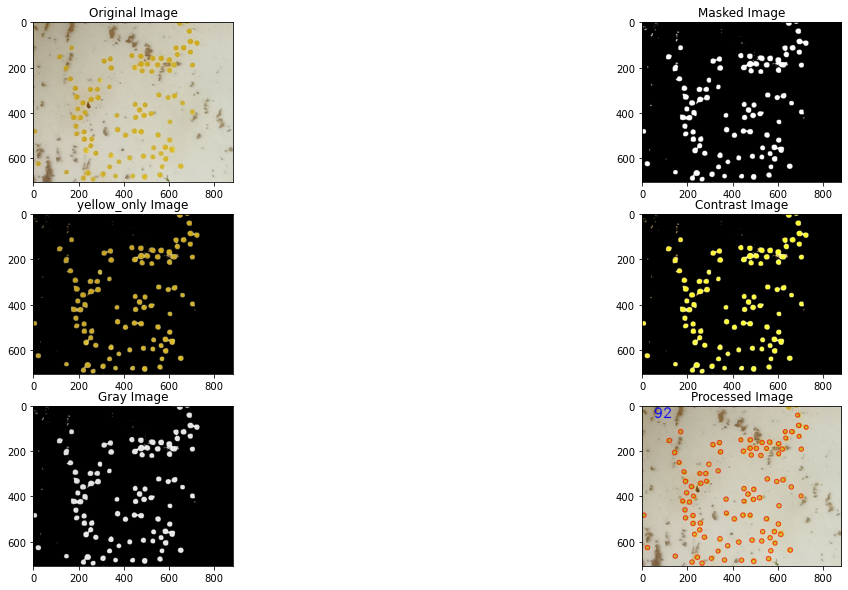

In [10]:
# Membaca/mengimport gambar
img = cv2.imread("telur.jpeg")
ori_img = cv2.imread("telur.jpeg")

# Convert color space gambar dari BGR ke HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Menentukan range lower dan upper untuk warna yellow dalam HSV
lower_yellow = (20, 100, 100)
upper_yellow = (30, 255, 255)

# Membuat mask untuk hanya memilih piksel berwarna kuning
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Meng-apply mask ke gambar original  untuk hanya memilih piksel berwarna kuning
yellow_only = cv2.bitwise_and(img, img, mask=mask)

# Meng-adjust kontras pada gambar
contrast = cv2.convertScaleAbs(yellow_only, alpha=1.5, beta=0)

# Deteksi lingkaran dengan HoughCircles
gray = cv2.cvtColor(contrast, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=7, param2=8, minRadius=8, maxRadius=11)

# Hitung jumlah lingkaran yang terdeteksi
if circles is not None:
    num_circles = len(circles[0])
else:
    print("No circles detected.")

# Gambar lingkaran di gambar awal
if circles is not None:
    circles = circles[0]
    for circle in circles:
        x, y, r = circle.astype(int)
        cv2.circle(img, (x, y), r, (0, 0, 255), 2)

# Menambahkan teks jumlah lingkaran di gambar
if circles is not None:
    cv2.putText(img, f" {num_circles}", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3)
 
# Convert gambar dari BGR ke RGB
ori_img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
yellow_only = cv2.cvtColor(yellow_only, cv2.COLOR_BGR2RGB)
contrast = cv2.cvtColor(contrast, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)

# Membuat gambar dengan dua subplot
fig, axs = plt.subplots(3, 2, figsize=(20, 10))

# Menunjukkan gambar original di subplot pertama
axs.flatten()[0].imshow(ori_img)
axs.flatten()[0].set_title('Original Image')

# Menunjukkan gambar mask di subplot kedua
axs.flatten()[1].imshow(mask)
axs.flatten()[1].set_title('Masked Image')

# Menunjukkan gambar dengan hanya warna kuning di subplot ketiga
axs.flatten()[2].imshow(yellow_only)
axs.flatten()[2].set_title('yellow_only Image')

# Menunjukkan gambar yang telah di-adjust kontrasnya di subplot keempat
axs.flatten()[3].imshow(contrast)
axs.flatten()[3].set_title('Contrast Image')

# Menunjukkan gambar grayscale di subplot kelima
axs.flatten()[4].imshow(gray)
axs.flatten()[4].set_title('Gray Image')

# Menunjukkan gambar dengan lingkaran yang terdeteksi di subplot keenam
axs.flatten()[5].imshow(img)
axs.flatten()[5].set_title('Processed Image')

plt.show()